In [1]:
# ruff: disable
"""An example notebook for a data_analysis notebook you may write.

Please use the recommended TNR font unless your venue requires otherwise.
"""

# Write down all of your code for data analysis in this file.
# Plot the data and save the figures/tables in the folders "plots" and "tables"
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from pathlib import Path

# Use TNR for all figures
# to match paper templates
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = [
    "Times New Roman",
] + plt.rcParams["font.serif"]

# Whitegrid is most appropriate
# for scientific papers
sns.set_style("whitegrid")

# An optional colorblind palette
# for figures
CB_color_cycle = [
    "#377EB8",
    "#FF7F00",
    "#4DAF4A",
    "#F781BF",
    "#A65628",
    "#984EA3",
    "#999999",
    "#E41A1C",
    "#DEDE00",
]

In [16]:
import wandb

api = wandb.Api()
entity, project = "kornelszabo", "template"
runs = api.runs(entity + "/" + project)
runs = [
    run
    for run in runs
    if (("compare" in run.name) or ("fairness" in run.name and "afl" in run.name))
]

summary_list, config_list, name_list = [], [], []
for run in runs:
    # .summary contains output keys/values for
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame(
    {"summary": summary_list, "config": config_list, "name": name_list}
)

# runs_df.to_csv("project.csv")
runs_df

,summary,config,name
0,"{'max_train_loss': 0.05057782671103875, 'clien...","{'fed': {'seed': 5, 'num_rounds': 50, 'rng_fol...",afl_5_fairness_high_lambda_high_lr
1,"{'test_accuracy': 0.6504205773142185, 'train_a...","{'fed': {'seed': 4, 'num_rounds': 50, 'rng_fol...",afl_4_fairness_high_lambda_high_lr
2,{'client_train_loss': {'8': 0.0280842624082034...,"{'fed': {'seed': 3, 'num_rounds': 50, 'rng_fol...",afl_3_fairness_high_lambda_high_lr
3,{'client_train_loss': {'1': 0.0250268766679463...,"{'fed': {'seed': 2, 'num_rounds': 50, 'rng_fol...",afl_2_fairness_high_lambda_high_lr
4,"{'max_train_loss': 0.019946489329414348, 'cent...","{'fed': {'seed': 1, 'num_rounds': 50, 'rng_fol...",afl_1_fairness_high_lambda_high_lr
5,"{'train_loss_max': 0.11189840376377104, 'clien...","{'fed': {'seed': 5, 'num_rounds': 50, 'rng_fol...",afl_5_fairness_high_lambda
6,"{'_wandb': {'runtime': 1325}, 'lambdas': {'2':...","{'fed': {'seed': 4, 'num_rounds': 50, 'rng_fol...",afl_4_fairness_high_lambda
7,"{'lambdas': {'0': 0, '1': 0.10329508936456212,...","{'fed': {'seed': 3, 'num_rounds': 50, 'rng_fol...",afl_3_fairness_high_lambda
8,"{'_runtime': 1385.871652841568, '_timestamp': ...","{'fed': {'seed': 2, 'num_rounds': 50, 'rng_fol...",afl_2_fairness_high_lambda
9,"{'lambdas': {'4': 0.03230096077944773, '6': 0....","{'fed': {'seed': 1, 'num_rounds': 50, 'rng_fol...",afl_1_fairness_high_lambda


In [17]:
def get_artifact(run):
    path = Path("./artifacts/mapping/") / run.name
    if path.exists():
        mapping = pd.read_csv(path)
        data = mapping[run.name].item()
    else:
        artifact = run.logged_artifacts()
        if len(artifact) == 0:
            return pd.DataFrame()
        data = artifact[0].download()
        pd.DataFrame([data], columns=[run.name]).to_csv(path)
    return pd.read_parquet(data)

In [18]:
artifacts = {}
for run in runs:
    if run.name not in artifacts:
        artifacts[run.name] = get_artifact(run)

In [19]:
def name_from_row(row):
    return f"{row.split('_')[0]}_{row.split('_', 2)[2]}"

In [20]:
dfx = runs_df.assign(model=lambda df: df.name.apply(name_from_row)).set_index("model")

dfx

dfy = dfx.assign(
    train_acc=lambda df: df.summary.apply(lambda row: row["train_accuracy"]),
    test_acc=lambda df: df.summary.apply(lambda row: row["test_accuracy"]),
    # test_acc_max=lambda df: df.name.apply(
    #     lambda name: artifacts[name].test_accuracy.max().item()
    # ),
    # test_acc_max=lambda df: df.summary.apply(lambda row: row['test_accuracy'].max()),
)

dfy = dfy.rename(lambda name: name if name != "afl_compare" else "afl_fairness", axis=0)

dfy

,summary,config,name,train_acc,test_acc
model,,,,,
afl_fairness_high_lambda_high_lr,"{'max_train_loss': 0.05057782671103875, 'clien...","{'fed': {'seed': 5, 'num_rounds': 50, 'rng_fol...",afl_5_fairness_high_lambda_high_lr,0.967768,0.528605
afl_fairness_high_lambda_high_lr,"{'test_accuracy': 0.6504205773142185, 'train_a...","{'fed': {'seed': 4, 'num_rounds': 50, 'rng_fol...",afl_4_fairness_high_lambda_high_lr,0.941886,0.650421
afl_fairness_high_lambda_high_lr,{'client_train_loss': {'8': 0.0280842624082034...,"{'fed': {'seed': 3, 'num_rounds': 50, 'rng_fol...",afl_3_fairness_high_lambda_high_lr,0.975347,0.628870
afl_fairness_high_lambda_high_lr,{'client_train_loss': {'1': 0.0250268766679463...,"{'fed': {'seed': 2, 'num_rounds': 50, 'rng_fol...",afl_2_fairness_high_lambda_high_lr,0.988454,0.235491
afl_fairness_high_lambda_high_lr,"{'max_train_loss': 0.019946489329414348, 'cent...","{'fed': {'seed': 1, 'num_rounds': 50, 'rng_fol...",afl_1_fairness_high_lambda_high_lr,0.986196,0.221080
afl_fairness_high_lambda,"{'train_loss_max': 0.11189840376377104, 'clien...","{'fed': {'seed': 5, 'num_rounds': 50, 'rng_fol...",afl_5_fairness_high_lambda,0.937297,0.530657
afl_fairness_high_lambda,"{'_wandb': {'runtime': 1325}, 'lambdas': {'2':...","{'fed': {'seed': 4, 'num_rounds': 50, 'rng_fol...",afl_4_fairness_high_lambda,0.925425,0.702009
afl_fairness_high_lambda,"{'lambdas': {'0': 0, '1': 0.10329508936456212,...","{'fed': {'seed': 3, 'num_rounds': 50, 'rng_fol...",afl_3_fairness_high_lambda,0.883233,0.696027
afl_fairness_high_lambda,"{'_runtime': 1385.871652841568, '_timestamp': ...","{'fed': {'seed': 2, 'num_rounds': 50, 'rng_fol...",afl_2_fairness_high_lambda,0.963107,0.346842


In [21]:
len(artifacts["fedavg_3_compare"])

51

In [22]:
for k, v in artifacts.items():
    print(k)
    v.train_accuracy

afl_5_fairness_high_lambda_high_lr
afl_4_fairness_high_lambda_high_lr
afl_3_fairness_high_lambda_high_lr
afl_2_fairness_high_lambda_high_lr
afl_1_fairness_high_lambda_high_lr
afl_5_fairness_high_lambda
afl_4_fairness_high_lambda
afl_3_fairness_high_lambda
afl_2_fairness_high_lambda
afl_1_fairness_high_lambda
fedadagrad_5_compare
fedadagrad_4_compare
fedadagrad_3_compare
fedavg_5_compare
fedadagrad_2_compare
fedadam_5_compare
fedadagrad_1_compare
fedadam_4_compare
fedadam_3_compare
afl_5_compare
fedadam_2_compare
afl_4_compare
fedadam_1_compare
afl_3_compare
afl_2_compare
afl_1_compare
fedavg_4_compare
fedavg_3_compare
fedavg_2_compare
fedavg_1_compare


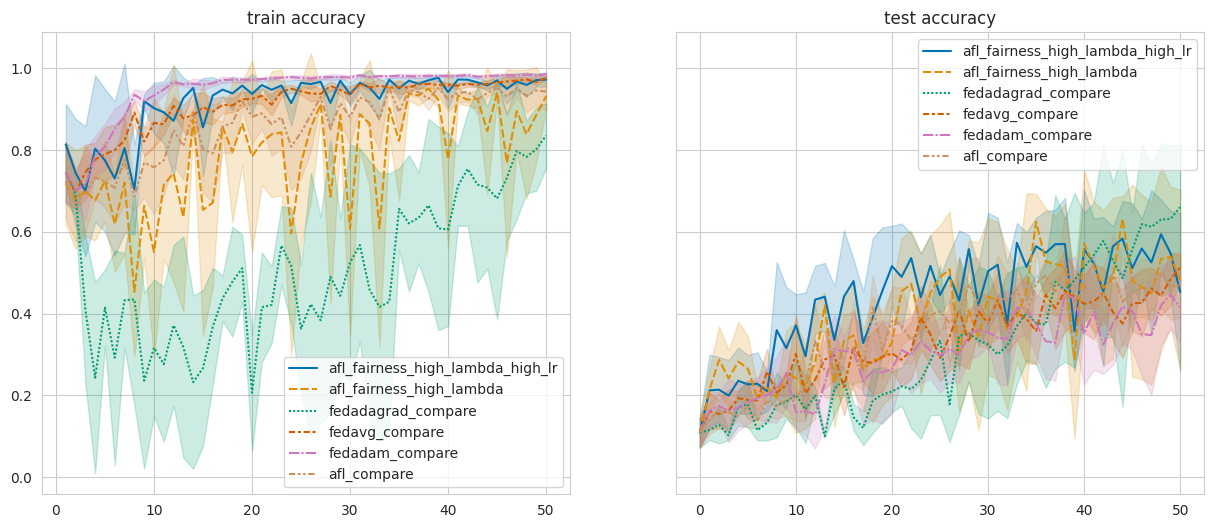

In [25]:
train = pd.DataFrame(
    np.array([v.train_accuracy.values for v in artifacts.values()]).T,
    columns=[name_from_row(name) for name in artifacts],
)

test = pd.DataFrame(
    np.array([v.test_accuracy.values for v in artifacts.values()]).T,
    columns=[name_from_row(name) for name in artifacts],
)

train

fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
sns.lineplot(train, errorbar="sd", palette="colorblind", ax=ax[0]).set_title(
    "train accuracy"
)
sns.lineplot(test, errorbar="sd", palette="colorblind", ax=ax[1]).set_title(
    "test accuracy"
)


plt.savefig("./plots/exp_4.png", bbox_inches="tight")

In [26]:
x = dfy.groupby("model").agg({"test_acc": ["mean", "std"]}).round(2)

print(x.droplevel(axis=1, level=0).T.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
model & afl_fairness & afl_fairness_high_lambda & afl_fairness_high_lambda_high_lr & fedadagrad_compare & fedadam_compare & fedavg_compare \\
\midrule
mean & 0.470000 & 0.480000 & 0.450000 & 0.660000 & 0.410000 & 0.510000 \\
std & 0.090000 & 0.240000 & 0.210000 & 0.170000 & 0.090000 & 0.040000 \\
\bottomrule
\end{tabular}



In [29]:
for model in ["fedavg", "fedadam", "fedadagrad"]:
    print(
        f"{model}: {scipy.stats.ttest_ind(dfy.loc['afl_fairness_high_lambda_high_lr'].test_acc, dfy.loc[f'{model}_compare'].test_acc).pvalue}"
    )

fedavg: 0.5519452875492564
fedadam: 0.7185454980393395
fedadagrad: 0.12140670364897958
